In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [102]:
l=pd.read_csv('labeled_data.csv')
new_hate=l.drop(columns=['Unnamed: 0','count','hate_speech','offensive_language','neither'])
new_hate.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [2]:
#functions for cleaning text
def tweet_cleaner(text):
    sent=re.sub(r'(^!+)','',text)#multiple exclaimation marks at the beginning
    sent=re.sub(r'(RT @\w+?:\s)',' ',sent)#retweets RT @user_name
    sent=re.sub(r'RT','',sent)
    sent=re.sub(r'#','',sent)
    sent=re.sub(r'(@\w+):?','',sent)
    sent=re.sub(r'(^"\s&amp?;)','',sent)#Starting with @amp
    sent=re.sub(r'(&amp)','and',sent)#@amp anywhere in between
    sent=re.sub(r'(...\$)','',sent)#ending with ...
    #sent=re.sub(r'(#\w+)','',sent) removing things like #JT2020Tour
    sent=re.sub(r'(&#\d+)','',sent)#removing things like &#5670
    sent=re.sub(r'&\s?;','',sent)
    sent=re.sub(r'@\w+?:?\s','',sent)
    sent=re.sub(r'\n+','',sent)#removing newlines
    sent=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',sent)#URLs
    return sent
nlp=spacy.load('en_core_web_sm')
def cleaner(text):
    text=text.lower()
    cleaned=re.sub(r'[^a-zA-Z]',' ',text)
    sent=nlp(cleaned)
    tokens=[text for text in sent if (text.is_stop==False)]
    tokens=[text for text in tokens if (text.is_punct)==False]
    tokens=[text.lemma_ for text in tokens]
    to_string=" ".join(tokens)
    clean=re.sub(r'\s{2}|\s{3}|\s{4}|\s{5}',' ',to_string)
    clean=re.sub(r'\s\w\s',' ',clean)
    clean=re.sub(r'\s(ve)\s|\s(nd)\s|\s(st)\s|\s(th)\s|\s(rd)\s','',clean)
    return clean
#new_hate['cleaned_text']=new_hate['tweet'].apply(tweet_cleaner)

In [104]:
new_hate.head()

,class,tweet,cleaned_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,As a woman you shouldn't complain about clea...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold...tyga dwn bad for cuffin dat ...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck a bitch and she sta...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit you hear about me might be true or ...


In [106]:
new_hate.head()

,class,tweet,cleaned_text,cleaned_and_tokenized_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,As a woman you shouldn't complain about clea...,woman shouldn t complain clean house man tra...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold...tyga dwn bad for cuffin dat ...,boy dats cold tyga dwn bad cuffin dat hoe ...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck a bitch and she sta...,Dawg fuck bitch start cry confused shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit you hear about me might be true or ...,shit hear true faker bitch tell ya


In [107]:
hate=pd.read_csv('Hate_speech.csv')
hate.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [108]:
hate_speech=hate[hate['label']==1]

In [109]:
hate_speech.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [110]:
hate_speech=hate_speech.drop([17])

In [111]:
hate_speech['cleaned_tweet']=hate_speech['tweet'].apply(tweet_cleaner)

In [112]:
hate_speech.head()

,id,label,tweet,cleaned_tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...,cnn calls michigan middle school 'build the w...
14,15,1,no comment! in #australia #opkillingbay #se...,no comment! in australia opkillingbay seash...
23,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace,lets fight against love peace


In [113]:
seq_id=[i for i in range(hate_speech.shape[0])]

In [114]:
hate_speech['seq_id']=seq_id

In [115]:
hate_speech=hate_speech.set_index('seq_id')
hate_speech.head()

,id,label,tweet,cleaned_tweet
seq_id,,,,
0,14,1,@user #cnn calls #michigan middle school 'buil...,cnn calls michigan middle school 'build the w...
1,15,1,no comment! in #australia #opkillingbay #se...,no comment! in australia opkillingbay seash...
2,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says i am a . prove it lumpy.
3,35,1,it's unbelievable that in the 21st century we'...,it's unbelievable that in the 21st century we'...
4,57,1,@user lets fight against #love #peace,lets fight against love peace


In [116]:
hate_speech=hate_speech.drop([14,43,53,52,62,92,98,133,155,191,209,212,215,241,242,303,318,326,359,393,400,403,429,436,446,539,540,545,552,653,657,667,683,703])

In [117]:
hate_speech=hate_speech.drop([835,836,879,953,968,1025,1043,1065,1235,1378,1502,1537,1900,2240])

In [118]:
hate_speech.shape

(2193, 4)

In [119]:
hate_speech=hate_speech.dropna()

In [120]:
hate_speech['cleaned_and_tokenized_text']=hate_speech['cleaned_tweet'].apply(cleaner)

In [121]:
hate_speech=hate_speech.rename(columns={'label':'class'})
hate_speech.head()

,id,class,tweet,cleaned_tweet,cleaned_and_tokenized_text
seq_id,,,,,
0,14,1,@user #cnn calls #michigan middle school 'buil...,cnn calls michigan middle school 'build the w...,cnn call michigan middle school build wall c...
1,15,1,no comment! in #australia #opkillingbay #se...,no comment! in australia opkillingbay seash...,comment australia opkillingbay seashepherd...
2,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says i am a . prove it lumpy.,lumpy say prove lumpy
3,35,1,it's unbelievable that in the 21st century we'...,it's unbelievable that in the 21st century we'...,s unbelievable st century d need like neveru...
4,57,1,@user lets fight against #love #peace,lets fight against love peace,let fight love peace


In [122]:
hate_speech['class']=0

In [123]:
final_hate_df=pd.concat([new_hate,hate_speech],join='inner')

In [5]:
def rename(row):
    if row==0: return 'hate_speech'
    if row==1: return 'offensive_language'
    if row==2: return 'neither'
#final_hate_df['class']=final_hate_df['class'].apply(rename)
#final_hate_df.head()

In [125]:
final_hate_df.reset_index(drop=True, inplace=True)
final_hate_df.head()

,class,tweet,cleaned_and_tokenized_text
0,neither,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldn t complain clean house man tra...
1,offensive_language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad cuffin dat hoe ...
2,offensive_language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg fuck bitch start cry confused shit
3,offensive_language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,offensive_language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear true faker bitch tell ya


In [126]:
final_hate_df[final_hate_df.index.duplicated()]

,class,tweet,cleaned_and_tokenized_text


In [127]:
final_hate_df=final_hate_df.reindex(np.random.permutation(final_hate_df.index))
final_hate_df.head()

,class,tweet,cleaned_and_tokenized_text
5447,offensive_language,@_xpriceless_ bitch take dat shit down imediatly,bitch dat shit imediatly
2845,offensive_language,@ChrisHeben you motherfuckin' bullshit slingin...,motherfuckin bullshit slingin son whore disg...
14246,offensive_language,RT @AwwBroYouAhHoe: Big booty bitches always win.,big booty bitch win
13257,offensive_language,"New years ever, get at me bitch. #loaded #GFU ...",new year bitch loaded GFU
21990,offensive_language,This bitch look like kurt cobain older bro,bitch look like kurt cobain old bro


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_hate_df['cleaned_and_tokenized_text'],final_hate_df['class'],test_size=0.25,random_state=42)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 4), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

In [33]:
tfidf.fit(list(X_train) + list(X_test))
Tf_train=tfidf.transform(X_train)
Tf_test=tfidf.transform(X_test)

In [145]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(Tf_train,y_train)
pred=nb.predict(Tf_test)
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0,max_iter=1000)
lr.fit(Tf_train,y_train)
pred=lr.predict(Tf_test)
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))

accuracy: 0.8073843416370107
                    precision    recall  f1-score   support

       hate_speech       0.96      0.36      0.52       879
           neither       0.91      0.35      0.51      1084
offensive_language       0.79      0.99      0.88      4781

          accuracy                           0.81      6744
         macro avg       0.89      0.57      0.64      6744
      weighted avg       0.83      0.81      0.77      6744

						
Confusion Matrix:		
[[ 315   13  551]
 [   8  379  697]
 [   6   24 4751]]
accuracy: 0.8941281138790036
                    precision    recall  f1-score   support

       hate_speech       0.80      0.63      0.70       879
           neither       0.86      0.82      0.84      1084
offensive_language       0.91      0.96      0.94      4781

          accuracy                           0.89      6744
         macro avg       0.86      0.80      0.83      6744
      weighted avg       0.89      0.89      0.89      6744

						
Confusi

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models=[DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for model in models:
    model.fit(Tf_train,y_train)
    pred=model.predict(Tf_test)
    model_name=str(model).replace('()','')
    print(f'accuracy of {model_name}: {accuracy_score(pred, y_test)}')
    print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
    print(confusion_matrix(y_test,pred))
    print('\t\t\t\t\t\t\nClassification Report:\t\t')
    print(classification_report(y_test,pred))

accuracy of DecisionTreeClassifier: 0.8674338663876849
						
Confusion Matrix:		
[[ 521  130  244]
 [  60  882  109]
 [ 209  135 4401]]
						
Classification Report:		
                    precision    recall  f1-score   support

       hate_speech       0.66      0.58      0.62       895
           neither       0.77      0.84      0.80      1051
offensive_language       0.93      0.93      0.93      4745

          accuracy                           0.87      6691
         macro avg       0.78      0.78      0.78      6691
      weighted avg       0.87      0.87      0.87      6691

accuracy of RandomForestClassifier: 0.8898520400538036
						
Confusion Matrix:		
[[ 524   73  298]
 [  53  869  129]
 [  81  103 4561]]
						
Classification Report:		
                    precision    recall  f1-score   support

       hate_speech       0.80      0.59      0.67       895
           neither       0.83      0.83      0.83      1051
offensive_language       0.91      0.96      0.94      474

In [208]:
from sklearn.model_selection import GridSearchCV

In [214]:
#Hyperparameter optimization for Logistic Regression
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param=dict(solver=solvers,penalty=penalty,C=c_values)
gs=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1, scoring='f1_micro')
gs_res=gs.fit(Tf_train,y_train)
print(f'Best f1 score: {gs_res.best_score_} with parameters: {gs_res.best_params_}')

Best f1 score: 0.8883522242512353 with parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [215]:
#Hyperparameter optimization for Logistic Regression
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
param=dict(n_estimators=n_estimators,max_features=max_features)
gs=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1, scoring='f1_micro')
gs_res=gs.fit(Tf_train,y_train)
print(f'Best f1 score: {gs_res.best_score_} with parameters: {gs_res.best_params_}')

Best f1 score: 0.8931845266349843 with parameters: {'max_features': 'sqrt', 'n_estimators': 1000}


In [261]:
#Hyperparameter optimization for Support Vector Machine
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
param=dict(kernel=kernel,C=C,gamma=gamma)
gs=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1, scoring='f1_micro')
gs_res=gs.fit(Tf_train,y_train)
print(f'Best f1 score: {gs_res.best_score_} with parameters: {gs_res.best_params_}')

Best f1 score: 0.8981667774247171 with parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [262]:
#Hyperparameter optimization for Bagging Classifier
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
param=dict(n_estimators=n_estimators)
gs=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1, scoring='f1_micro')
gs_res=gs.fit(Tf_train,y_train)
print(f'Best f1 score: {gs_res.best_score_} with parameters: {gs_res.best_params_}')

KeyboardInterrupt: 

In [ ]:
#Hyperparameter optimization for GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
param= dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
gs=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1, scoring='f1_micro')
gs_res=gs.fit(Tf_train,y_train)
print(f'Best f1 score: {gs_res.best_score_} with parameters: {gs_res.best_params_}')

In [220]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
param= dict(alpha=alpha)
gs=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1, scoring='f1_micro')
gs_res=gs.fit(Tf_train,y_train)
print(f'Best f1 score: {gs_res.best_score_} with parameters: {gs_res.best_params_}')

Best f1 score: 0.8682744143939548 with parameters: {'alpha': 0.9}


In [73]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
ad=AdaBoostClassifier()
lr= LogisticRegression(max_iter=1000,C=1.0, penalty='l1', solver= 'liblinear')
rf=RandomForestClassifier(max_features='sqrt', n_estimators=1000)
svm=SVC(C=1.0,gamma='scale',kernel='sigmoid',probability=True)
rc=RidgeClassifier(alpha=0.9)
vc = VotingClassifier(estimators=[('ad', ad), ('rf', rf),('svm',svm)], voting='soft',weights=[2,1,1])
vc.fit(Tf_train,y_train)
pred=vc.predict(Tf_test)
print(f'f1-scores for each class: {f1_score(pred,y_test,average=None)}')
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))

f1-scores for each class: [0.74271544 0.86553465 0.94760726]


NameError: name 'accuracy_score' is not defined

In [240]:
lr= LogisticRegression(max_iter=1000,C=1.0, penalty='l1', solver= 'liblinear')
lr.fit(Tf_train,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [258]:
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(Tf_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [3]:
rc=RidgeClassifier(alpha=0.9)
rc.fit(Tf_train,y_train)

NameError: name 'RidgeClassifier' is not defined

In [34]:
from sklearn.svm import SVC
svm=SVC(C=1.0,gamma='scale',kernel='sigmoid')
svm.fit(Tf_train,y_train)

SVC(kernel='sigmoid')

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier().fit(Tf_train,y_train)

In [153]:
final_hate_df.tail()

,class,tweet,cleaned_and_tokenized_text
26975,offensive_language,@treagle05 your still a little pussy tomcat &#...,little pussy tomcat
26976,hate_speech,Muslims are trying to make their war secular.T...,Muslims try war secular coward proud Hindus no...
26977,neither,Covid vaccine: Pfizer 'very close' to applying...,covid vaccine Pfizer close apply emergency ...
26978,neither,‘Twitter has apologised in writing for ‘Ladakh...,Twitter apologise writing Ladakh China erro...
26979,neither,Time for Griezmann to shine for Barcelona,time Griezmann shine Barcelona


In [5]:
nlp=spacy.load('en_core_web_md')

In [6]:
final_hate_df=pd.read_csv('final_hate_speech.csv')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
final_hate_df_copy=final_hate_df.copy()

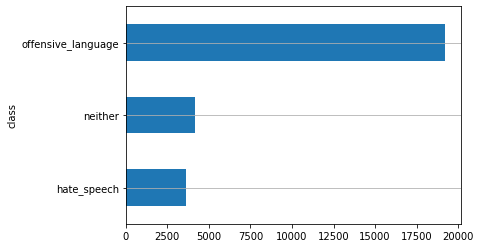

In [5]:
fig,ax=plt.subplots()
final_hate_df['class'].reset_index().groupby('class').count().sort_values(by='index').plot(kind='barh',legend=False,ax=ax).grid(axis='y')

In [37]:
tfidf.fit(X_train)
Tf_train=tfidf.transform(X_train)
#Tf_test=tfidf.transform(X_test)
dic_vocab=tfidf.vocabulary_

Text(0.5, 1.0, 'Sparse Matrix')

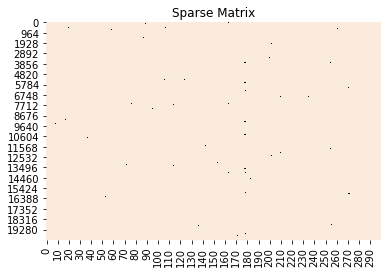

In [49]:
sns.heatmap(Tf_train.todense()[:,np.random.randint(0,Tf_train.shape[1],300)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix')

In [59]:
from sklearn.feature_selection import chi2
y=y_train
X=tfidf.get_feature_names()
df_features=pd.DataFrame()
p_value_lim=0.95
for label in np.unique(y):
    chi2_features,p=chi2(Tf_train,y==label)
    df_features=df_features.append(pd.DataFrame({'feature':X,'score':1-p,'label':label}))
    df_features=df_features[df_features["score"]>p_value_lim]

,feature,score,label
0,aand,0.997075,hate_speech
1,aand e,0.999361,hate_speech
5,ableism,0.997932,hate_speech
14,abuse,0.999694,hate_speech
15,abuse claim,0.973972,hate_speech
...,...,...,...
11117,york,0.983111,offensive_language
11118,york yankees,0.973733,offensive_language
11146,zebra,0.995509,offensive_language
11148,zebras,0.994032,offensive_language


In [71]:
df_features=df_features.sort_values(by=['score','label'],ascending=[False,True])
for label in np.unique(y):
    print(f'class label : {label}')
    print(" top features:", ",".join(df_features[df_features['label']==label]['feature'].values[:10]))

class label : hate_speech
 top features: allahsoil,bitch,black,faggot,libtard,nigger,politic,racism,racist,trump
class label : neither
 top features: bird,bitch,brownie,charlie,hoe,jihadi,mock,monkey,oreo,trash
class label : offensive_language
 top features: bird,bitch,charlie,hoe,monkey,pussy,trash,trump,yankees,yellow


In [83]:
hate_words={'bitch','hoe','jihadi','trash','brownie','pussy','fuck','shit','nigga','niggah','fuck bitch','fuckin','ass bitch','eat pussy','dumb bitch','ass nigga'}
hate_idx=[]
for idx in (df_features[df_features['label']=='neither']['feature'].index):
    for word in hate_words:
        if word in final_hate_df['cleaned_and_tokenized_text'][idx]:
            hate_idx.append(idx)

802

In [84]:
hate_idx

[767,
 1818,
 4304,
 4304,
 4919,
 6289,
 6289,
 6326,
 6946,
 11010,
 6951,
 7508,
 3344,
 3345,
 8829,
 8829,
 3495,
 3495,
 3495,
 1920,
 1942,
 1942,
 1820,
 4915,
 1824,
 2915,
 2032,
 2032,
 2032,
 4551,
 3661,
 1830,
 6282,
 8536,
 8536,
 8520,
 2028,
 2520,
 4253,
 4825,
 9957,
 1819,
 8230,
 293,
 8954,
 2914,
 2914,
 9580,
 10142,
 582,
 3147,
 7217,
 4621,
 8827,
 6,
 6,
 6,
 11021,
 6687,
 7782,
 6773,
 6091,
 11013,
 3158,
 3158,
 3158,
 9534,
 7285,
 11146,
 1605,
 169,
 1832,
 787,
 7785,
 3376,
 3376,
 4001,
 11017,
 11017,
 3389,
 11148,
 71,
 71,
 3200,
 8634,
 8634,
 8710,
 8134,
 8134,
 8134,
 8134,
 8134,
 1451,
 1451,
 5374,
 4852,
 4852,
 5720,
 2419,
 2419,
 350,
 710,
 710,
 710,
 711,
 7031,
 7031,
 7032,
 7717,
 8742,
 8743,
 6955,
 11012,
 11086,
 2144,
 2144,
 2234,
 3616,
 3616,
 11011,
 11011,
 11011,
 1828,
 7688,
 7688,
 7226,
 7227,
 4002,
 4002,
 774,
 6327,
 6327,
 6327,
 4293,
 10856,
 9458,
 5936,
 10619,
 7822,
 6947,
 3897,
 2034,
 2034,
 2034,
 

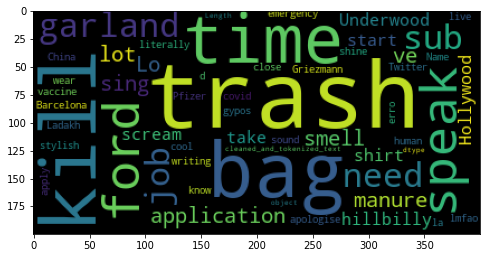

In [105]:
from wordcloud import WordCloud,STOPWORDS
wc=WordCloud()
#fig,axes=plt.subplots(3,1,figsize=(20,12))
op=final_hate_df[final_hate_df['class']=='neither']
op1=wc.generate(str(op['cleaned_and_tokenized_text']))
plt.figure(figsize =(8, 8)) 
plt.imshow(op1)

In [22]:
url='https://raw.githubusercontent.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/master/data/gab.csv'
gab_hate=pd.read_csv(url,error_bad_lines=False)

In [23]:
gab_hate=gab_hate.dropna()

In [179]:
idx=[]
for text in gab_hate['text']:
    text=text.replace("'",'')
    text=tweet_cleaner(text)
    text=cleaner(text)
    text_list=text.strip().split()
    if len(text_list)<3:
        print(text_list)

['nigger']
['li', 'retard']
['useless', 'nigger']
['blink', 'faggot']
['retard', 'academic']
['dyke', 'bitch']
['nigger', 'plague']
['message', 'cunt']
['retard', 'mute']
['cunt']
['retard']
['faggot', 'nigger']
['faggot']
['patriotinfidel', 'faggot']
['think', 'dyke']
['hope', 'retarded']
['nigger', 'yes']
['larpy', 'faggot']
['useless', 'nigger']
['faggot']
['royal', 'nigger']
['faggot', 'fuck']
['faggot', 'nigger']
['faggot']
['cunt']
['nigger']
['faggot', 'bwahhhhhhhhhhhahaha']
['s', 'retarded']
['retard', 'land']
['cunt']
['cunt', 'spook']
['broadcast', 'twat']
['retard', 'ale']
['cunt']
['nigger']
['choose', 'faggot']
['faggot']
['faggot']
['cunt']
['faggot', 'nigger']
['cunt']
['cunt']
['nigger', 'friut']
['nigger', 'gear']
['nigger', 'lover']
['retarded', 'inbreed']
['nigger']
['nigger', 'spam']
['religious', 'faggot']
['nigger', 'faggot']
['twat', 'real']
['nigger']
['dyke']
['muzzie']
['faggot']
['faggot']
['retard', 'keyboard']
['faggot']
['cunt', 'speak']
['cunt']
['guy', '

KeyboardInterrupt: 

In [24]:
gab_hate.head()

,id,text,hate_speech_idx,response
0,1. 39869714\n,1. i joined gab to remind myself how retarded ...,[1],"[""Using words that insult one group while defe..."
1,1. 39845588\n2. \t39848775\n3. \t\t39911017\n,1. This is what the left is really scared of. ...,[3],['You can disagree with someones opinion witho...
2,1. 37485560\n2. \t37528625\n,1. It makes you an asshole.\n2. \tGive it to a...,[2],['Your argument is more rational if you leave ...
3,1. 39787626\n2. \t39794481\n,1. So they manage to provide a whole lot of da...,[2],"[""You shouldn't generalize a specific group or..."
4,1. 37957930\n2. \t39953348\n3. \t\t39965219\n,"1. Hi there, i,m Keith, i hope you are doing w...",[3],['If someone is rude it is better to ignore th...


In [25]:
gab_hate=gab_hate.drop(columns=['id','hate_speech_idx','response'])
gab_hate.head()

,text
0,1. i joined gab to remind myself how retarded ...
1,1. This is what the left is really scared of. ...
2,1. It makes you an asshole.\n2. \tGive it to a...
3,1. So they manage to provide a whole lot of da...
4,"1. Hi there, i,m Keith, i hope you are doing w..."


In [26]:
gab_hate['class']=0

In [27]:
gab_hate['cleaned_text']=gab_hate['text'].apply(tweet_cleaner)

In [28]:
gab_hate['cleaned_and_tokenized_text']=gab_hate['cleaned_text'].apply(cleaner)

In [32]:
gab_hate.head()

,text,class,cleaned_text,cleaned_and_tokenized_text
0,1. i joined gab to remind myself how retarded ...,hate_speech,1. i joined gab to remind myself how retarded ...,join gab remind retarded jew hater wouldn t...
1,1. This is what the left is really scared of. ...,hate_speech,1. This is what the left is really scared of. ...,left scared literally look like monkey su...
2,1. It makes you an asshole.\n2. \tGive it to a...,hate_speech,1. It makes you an asshole.2. \tGive it to a ...,make asshole soldier defend try burn ...
3,1. So they manage to provide a whole lot of da...,hate_speech,1. So they manage to provide a whole lot of da...,manage provide lot datum critical little nu...
4,"1. Hi there, i,m Keith, i hope you are doing w...",hate_speech,"1. Hi there, i,m Keith, i hope you are doing w...",hi m keith hope honor know interested fu...


In [33]:
final_hate_df=final_hate_df.rename(columns={'tweet':'text'})
final_hate_df.head()

,Unnamed: 0,class,text,cleaned_and_tokenized_text
0,0,offensive_language,@_xpriceless_ bitch take dat shit down imediatly,bitch dat shit imediatly
1,1,offensive_language,@ChrisHeben you motherfuckin' bullshit slingin...,motherfuckin bullshit slingin son whore disg...
2,2,offensive_language,RT @AwwBroYouAhHoe: Big booty bitches always win.,big booty bitch win
3,3,offensive_language,"New years ever, get at me bitch. #loaded #GFU ...",new year bitch loaded GFU
4,4,offensive_language,This bitch look like kurt cobain older bro,bitch look like kurt cobain old bro


In [34]:
final_hate_df=final_hate_df.drop(columns=['Unnamed: 0'])
final_hate_df.head()

,class,text,cleaned_and_tokenized_text
0,offensive_language,@_xpriceless_ bitch take dat shit down imediatly,bitch dat shit imediatly
1,offensive_language,@ChrisHeben you motherfuckin' bullshit slingin...,motherfuckin bullshit slingin son whore disg...
2,offensive_language,RT @AwwBroYouAhHoe: Big booty bitches always win.,big booty bitch win
3,offensive_language,"New years ever, get at me bitch. #loaded #GFU ...",new year bitch loaded GFU
4,offensive_language,This bitch look like kurt cobain older bro,bitch look like kurt cobain old bro


In [18]:
url='https://raw.githubusercontent.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/master/data/reddit.csv'
reddit_hate=pd.read_csv(url,error_bad_lines=False)

In [23]:
reddit_hate.shape

(5020, 4)

In [24]:
reddit_hate=reddit_hate.dropna()

In [25]:
reddit_hate=reddit_hate.drop(columns=['id','hate_speech_idx','response'])
reddit_hate.head()

,text
0,1. A subsection of retarded Hungarians? Ohh bo...
1,"1. > ""y'all hear sumn?"" by all means I live i..."
3,1. Because the Japanese aren't retarded and kn...
4,1. That might be true if we didn't have an exa...
5,"1. Why, what is the point of making all of tha..."


In [26]:
reddit_hate['class']=0

In [27]:
reddit_hate['cleaned_text']=reddit_hate['text'].apply(tweet_cleaner)

In [30]:
reddit_hate['cleaned_and_tokenized_text']=reddit_hate['cleaned_text'].apply(cleaner)

In [30]:
gab_hate['class']=gab_hate['class'].apply(rename)

In [36]:
final_hate_df.head()

,class,text,cleaned_and_tokenized_text
0,offensive_language,@_xpriceless_ bitch take dat shit down imediatly,bitch dat shit imediatly
1,offensive_language,@ChrisHeben you motherfuckin' bullshit slingin...,motherfuckin bullshit slingin son whore disg...
2,offensive_language,RT @AwwBroYouAhHoe: Big booty bitches always win.,big booty bitch win
3,offensive_language,"New years ever, get at me bitch. #loaded #GFU ...",new year bitch loaded GFU
4,offensive_language,This bitch look like kurt cobain older bro,bitch look like kurt cobain old bro


In [37]:
new_hate_df=pd.concat([final_hate_df,gab_hate],join='inner')
new_hate_df.head()

,class,text,cleaned_and_tokenized_text
0,offensive_language,@_xpriceless_ bitch take dat shit down imediatly,bitch dat shit imediatly
1,offensive_language,@ChrisHeben you motherfuckin' bullshit slingin...,motherfuckin bullshit slingin son whore disg...
2,offensive_language,RT @AwwBroYouAhHoe: Big booty bitches always win.,big booty bitch win
3,offensive_language,"New years ever, get at me bitch. #loaded #GFU ...",new year bitch loaded GFU
4,offensive_language,This bitch look like kurt cobain older bro,bitch look like kurt cobain old bro


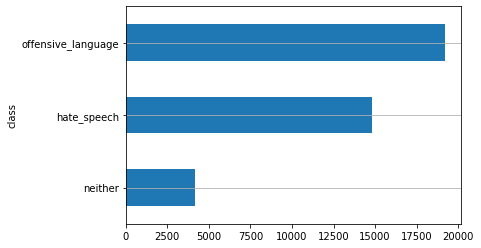

In [38]:
fig,ax=plt.subplots()
new_hate_df['class'].reset_index().groupby('class').count().sort_values(by='index').plot(kind='barh',legend=False,ax=ax).grid(axis='y')

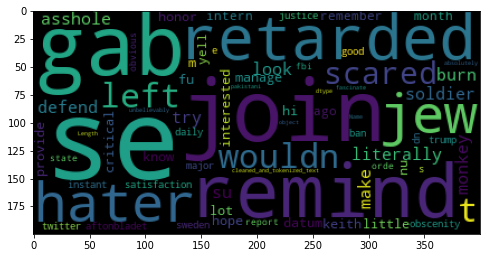

In [32]:
from wordcloud import WordCloud,STOPWORDS
wc=WordCloud()
#fig,axes=plt.subplots(3,1,figsize=(20,12))
op1=wc.generate(str(gab_hate['cleaned_and_tokenized_text']))
plt.figure(figsize =(8, 8)) 
plt.imshow(op1)

In [10]:
neither_text=pd.read_json('News_Category_Dataset_v2.json',lines=True)
neither_text.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [11]:
neither_text=neither_text.drop(list(neither_text[neither_text['headline']==""].index))
neither_text[neither_text['headline']=='']

,category,headline,authors,link,short_description,date


In [12]:
neither_text=neither_text.drop(columns=['link'])
neither_text.head()

,category,headline,authors,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [13]:
neither_text['text']=neither_text['headline'] + "." + ' ' + neither_text['short_description']
neither_text['text']

0         There Were 2 Mass Shootings In Texas Last Week...
1         Will Smith Joins Diplo And Nicky Jam For The 2...
2         Hugh Grant Marries For The First Time At Age 5...
3         Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4         Julianna Margulies Uses Donald Trump Poop Bags...
                                ...                        
200848    RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849    Maria Sharapova Stunned By Victoria Azarenka I...
200850    Giants Over Patriots, Jets Over Colts Among  M...
200851    Aldon Smith Arrested: 49ers Linebacker Busted ...
200852    Dwight Howard Rips Teammates After Magic Loss ...
Name: text, Length: 200847, dtype: object

In [14]:
neither_text=neither_text.drop(columns=['authors'])
neither_text.head()

,category,headline,short_description,date,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...


In [15]:
neither_text['Year']=neither_text['date'].dt.year
neither_text.head()

,category,headline,short_description,date,text,Year
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,2018
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,2018
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,2018
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,2018


In [16]:
neither_text[(neither_text['Year']>=2017) & ~(neither_text['category']=='QUEER VOICES')]
list_of_indexes=list(neither_text[(neither_text['Year']>=2017) & (neither_text['category']=='POLITICS')].index)[:6841]
politics_df=neither_text.iloc[list_of_indexes,:]

In [17]:
other_df=neither_text[(neither_text['Year']>=2018) & ~(neither_text['category']=='QUEER VOICES') & ~(neither_text['category']=='POLITICS') & ~(neither_text['category']=='WEIRD NEWS') & ~(neither_text['category']=='GREEN') & ~(neither_text['category']=='ARTS') & ~(neither_text['category']=='GOOD NEWS') & ~(neither_text['category']=='WORLDPOST')]

In [18]:
final_neither_df=pd.concat([politics_df,other_df])

In [19]:
final_neither_df['class']='neither'

In [20]:
final_neither_df.head()

,category,headline,short_description,date,text,Year,class
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Last month a Health and Human Services officia...,2018-05-26,Trump's Crackdown On Immigrant Parents Puts Mo...,2018,neither
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,The wiretaps feature conversations between Ale...,2018-05-26,'Trump's Son Should Be Concerned': FBI Obtaine...,2018,neither
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,"But don't count on Robert Mueller to nail him,...",2018-05-26,Edward Snowden: There's No One Trump Loves Mor...,2018,neither
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Just a peeping minute.,2018-05-26,Booyah: Obama Photographer Hilariously Trolls ...,2018,neither
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Irish women will no longer have to travel to t...,2018-05-26,Ireland Votes To Repeal Abortion Amendment In ...,2018,neither


In [21]:
new_hate_df=new_hate_df.rename(columns={'tweet':'text'})

NameError: name 'new_hate_df' is not defined

In [108]:
final_hate_df=final_hate_df.drop(columns=['Unnamed: 0'])

In [39]:
final_neither_df['cleaned_and_tokenized_text']=final_neither_df['text'].apply(cleaner)

In [40]:
final_df=pd.concat([new_hate_df,final_neither_df],join='inner')

In [43]:
final_df.shape

(49820, 3)

In [44]:
final_df.reset_index(drop=True, inplace=True)
final_df.head()

,class,text,cleaned_and_tokenized_text
0,offensive_language,@_xpriceless_ bitch take dat shit down imediatly,bitch dat shit imediatly
1,offensive_language,@ChrisHeben you motherfuckin' bullshit slingin...,motherfuckin bullshit slingin son whore disg...
2,offensive_language,RT @AwwBroYouAhHoe: Big booty bitches always win.,big booty bitch win
3,offensive_language,"New years ever, get at me bitch. #loaded #GFU ...",new year bitch loaded GFU
4,offensive_language,This bitch look like kurt cobain older bro,bitch look like kurt cobain old bro


In [45]:
final_hate_df[final_hate_df.index.duplicated()]

,class,text,cleaned_and_tokenized_text


In [46]:
final_df=final_df.reindex(np.random.permutation(final_df.index))
final_df.head()

,class,text,cleaned_and_tokenized_text
13357,offensive_language,@katiieR nah this bitch dykey,nah bitch dykey
29286,hate_speech,1. Alex Jones breaks down how the Pittsburgh s...,alex jones break pittsburgh synagogue shoot...
31605,hate_speech,1. THESE ARE THE MONSTERS I MUST DEAL WITH IN ...,monster deal state god help dry twat nee...
12749,neither,"Alarm set, early bird n all that. Night all xx",alarm set early bird n night xx
31799,hate_speech,1. Msm can bite me!\n2. \twho is the nigger gu...,msm bite nigger guy right


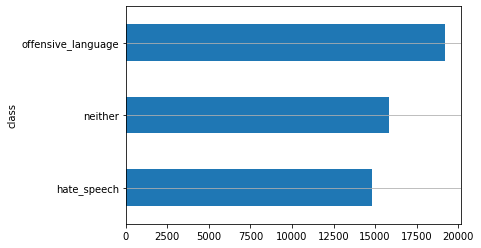

In [47]:
fig,ax=plt.subplots()
final_df['class'].reset_index().groupby('class').count().sort_values(by='index').plot(kind='barh',legend=False,ax=ax).grid(axis='y')

In [3]:
final_df=pd.read_csv('final-dataframe.csv')
#final_df=final_df.drop(columns=['Unnamed: 0'])
final_df.tail()

,Unnamed: 0,class,text,cleaned_and_tokenized_text
49880,49880,hate_speech,Egyptian Islamic Scholar Zaghloul Al-Naggar: J...,egyptian islamic scholar zaghloul al naggar j...
49881,49881,hate_speech,Hamas TV Animation Depicts Palestinians Stabbi...,hamas tv animation depict palestinians stab s...
49882,49882,neither,"Kamala Harris has become the first woman,first...",kamala harris woman black american asian ameri...
49883,49883,neither,parents should never put their children in a p...,parent child position random person come rejec...
49884,49884,neither,My son has the darkest complexion ever known t...,son dark complexion know side family people tr...


In [4]:
final_df=final_df.drop(columns=['Unnamed: 0'])
final_df.tail()

,class,text,cleaned_and_tokenized_text
49880,hate_speech,Egyptian Islamic Scholar Zaghloul Al-Naggar: J...,egyptian islamic scholar zaghloul al naggar j...
49881,hate_speech,Hamas TV Animation Depicts Palestinians Stabbi...,hamas tv animation depict palestinians stab s...
49882,neither,"Kamala Harris has become the first woman,first...",kamala harris woman black american asian ameri...
49883,neither,parents should never put their children in a p...,parent child position random person come rejec...
49884,neither,My son has the darkest complexion ever known t...,son dark complexion know side family people tr...


In [5]:
doc_vectors = np.array([nlp(text).vector for text in tqdm(final_df['cleaned_and_tokenized_text'])])

KeyboardInterrupt: 

In [20]:
X_train,X_test,y_train,y_test=train_test_split(doc_vectors,final_df['class'],test_size=0.3,random_state=42,stratify=final_df['class'])

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import pickle
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
filename='Adaboost.pkl'
pickle.dump(ad,open(filename,'wb'))
print('file saved!')
pred=ad.predict(X_test)
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))

file saved!
accuracy: 0.8292894859969253
                    precision    recall  f1-score   support

       hate_speech       0.77      0.73      0.75      4442
           neither       0.84      0.85      0.84      4758
offensive_language       0.86      0.89      0.88      5761

          accuracy                           0.83     14961
         macro avg       0.82      0.82      0.82     14961
      weighted avg       0.83      0.83      0.83     14961

						
Confusion Matrix:		
[[3254  562  626]
 [ 538 4030  190]
 [ 418  220 5123]]


In [22]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=1000,C=1.0, penalty='l1', solver= 'liblinear')
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
filename='Logistic.pkl'
pickle.dump(lr,open(filename,'wb'))
print('file saved!')
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))

file saved!
accuracy: 0.8726689392420293
                    precision    recall  f1-score   support

       hate_speech       0.82      0.81      0.82      4442
           neither       0.87      0.89      0.88      4758
offensive_language       0.92      0.91      0.91      5761

          accuracy                           0.87     14961
         macro avg       0.87      0.87      0.87     14961
      weighted avg       0.87      0.87      0.87     14961

						
Confusion Matrix:		
[[3599  506  337]
 [ 384 4235  139]
 [ 395  144 5222]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(X_train,y_train)
filename='RandomForest.pkl'
pickle.dump(rf,open(filename,'wb'))
print('file saved!')
pred=rf.predict(X_test)
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))

file saved!
accuracy: 0.8793529844261747
                    precision    recall  f1-score   support

       hate_speech       0.88      0.78      0.83      4442
           neither       0.86      0.92      0.89      4758
offensive_language       0.89      0.92      0.90      5761

          accuracy                           0.88     14961
         macro avg       0.88      0.87      0.88     14961
      weighted avg       0.88      0.88      0.88     14961

						
Confusion Matrix:		
[[3474  502  466]
 [ 175 4383  200]
 [ 277  185 5299]]


In [24]:
vc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('ad',ad)],voting='soft',weights=[1,1.5,1.3])
vc.fit(X_train,y_train)
pred=vc.predict(X_test)
filename='Voting.pkl'
pickle.dump(vc,open(filename,'wb'))
print('file saved!')
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))

file saved!
accuracy: 0.8890448499431857
                    precision    recall  f1-score   support

       hate_speech       0.86      0.83      0.84      4442
           neither       0.89      0.91      0.90      4758
offensive_language       0.91      0.92      0.91      5761

          accuracy                           0.89     14961
         macro avg       0.89      0.89      0.89     14961
      weighted avg       0.89      0.89      0.89     14961

						
Confusion Matrix:		
[[3676  408  358]
 [ 255 4352  151]
 [ 339  149 5273]]


In [6]:
sns.set_theme(style="whitegrid")
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

In [7]:
nlp=spacy.load('en_core_web_md')
rf_model=pickle.load(open('RandomForest.pkl','rb'))
ad_model=pickle.load(open('Adaboost.pkl','rb'))
lr_model=pickle.load(open('Logistic.pkl','rb'))
vc_model=pickle.load(open('Voting.pkl','rb'))

In [12]:
sent=''''''
tokens=cleaner(sent)
print(tokens)
vectors=nlp(tokens).vector.reshape(1,-1)
#print(vectors)
print(f'Random forest says: {rf_model.predict(vectors)} with probabilities {rf_model.predict_proba(vectors)}')
print(f'AdaBoost Classifier says: {ad_model.predict(vectors)} with probabilities {ad_model.predict_proba(vectors)}')
print(f'Logistic regression says: {lr_model.predict(vectors)} with probabilities {lr_model.predict_proba(vectors)}')
print(f'Voting classifier says: {vc_model.predict(vectors)} with probabilities {vc_model.predict_proba(vectors)}')
allow=input('Do you want to insert this text in the data?(Type Y/N)')
if allow=='Y':
    if (final_df['text']==sent).any()!=True:
        feedback=input('What is your prediction? (Type 1 for Hate Speech 2 for offensive language 3 for neither)')
        if feedback=='1':
            temp_df={'class':'hate_speech','text':sent,'cleaned_and_tokenized_text':tokens}
            final_df=final_df.append(temp_df,ignore_index=True)
            print('Record Added!')
        elif feedback=='2':
            temp_df={'class':'offensive_language','text':sent,'cleaned_and_tokenized_text':tokens}
            final_df=final_df.append(temp_df,ignore_index=True)
            print('Record Added!')
        else:
            temp_df={'class':'neither','text':sent,'cleaned_and_tokenized_text':tokens}
            final_df=final_df.append(temp_df,ignore_index=True)
            print('Record Added!')
        final_df.to_csv('final-dataframe.csv')
    else: print('Record already added!')

stop human traffic human sale  want remind pledge fight human trafficking need play eradicate contemporary slavery include trafficking person force sexual exploitation force labour force marriage etc aware alert
Random forest says: ['neither'] with probabilities [[0.318 0.63  0.052]]
AdaBoost Classifier says: ['neither'] with probabilities [[0.33932166 0.34604331 0.31463503]]
Logistic regression says: ['hate_speech'] with probabilities [[0.53722393 0.45110844 0.01166763]]
Voting classifier says: ['neither'] with probabilities [[0.3798329  0.48814192 0.13202518]]
Do you want to insert this text in the data?(Type Y/N)Y
What is your prediction? (Type 1 for Hate Speech 2 for offensive language 3 for neither)3
Record Added!


In [185]:
final_df=pd.read_csv('final-dataframe.csv')
final_df.tail()

,Unnamed: 0,Unnamed: 0.1,class,text,cleaned_and_tokenized_text
49851,49851,49851.0,neither,Wasim Khan warns Pakistan players: 'One more b...,wasim khan warn pakistan player breach will ...
49852,49852,NaN,neither,Ajmal Kasab was given Hindu identity to make i...,ajmal kasab give hindu identity appear hindu t...
49853,49853,NaN,neither,"Farmers' ""Ingenious"" Way Of Breaking Through H...",farmer ingenious way break hurdle hit twitte...
49854,49854,NaN,offensive_language,Friend was out for a run and had two incidents...,friend run incident wank man car group teena...
49855,49855,NaN,neither,"‘Why no ordinance for farmers, jobless youth?’...",ordinance farmer jobless youth akhilesh rea...


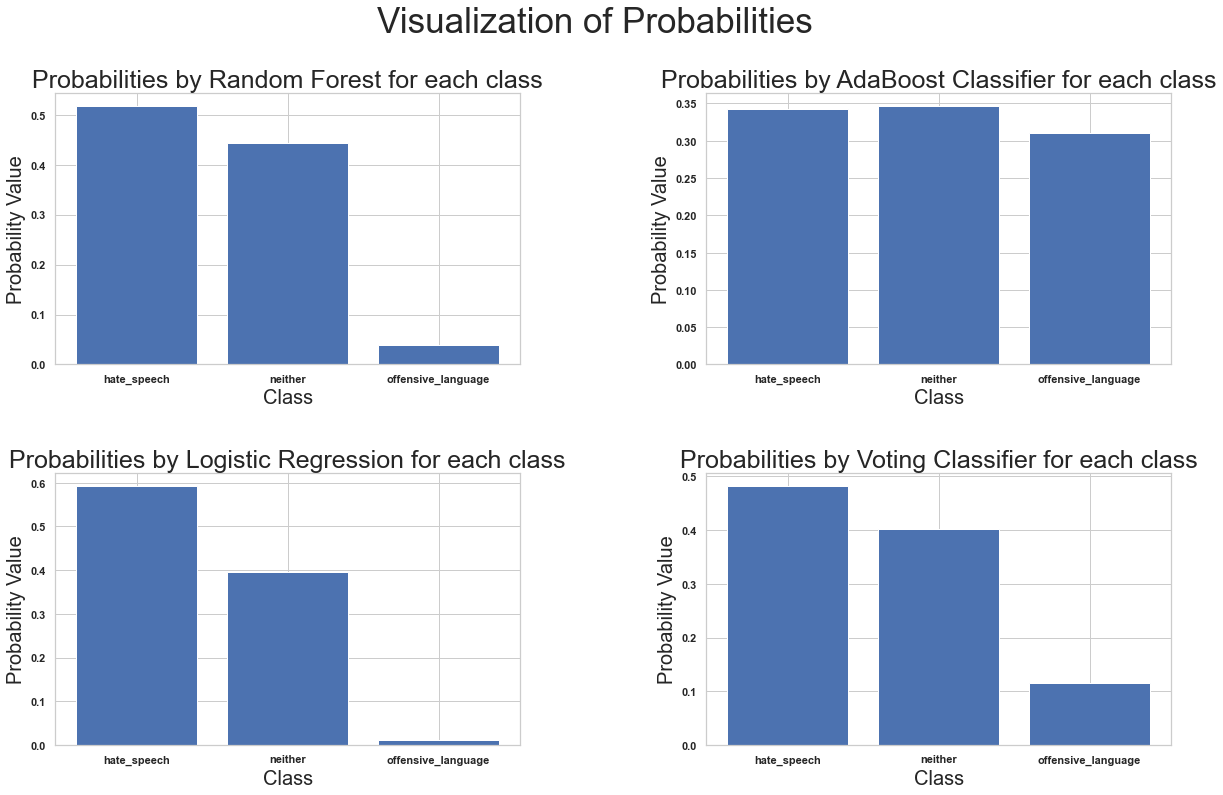

In [42]:
#Visualizing the probabilities
model_probs=[rf.predict_proba(vectors)[0],ad.predict_proba(vectors)[0],lr.predict_proba(vectors)[0],vc.predict_proba(vectors)[0]]
model_names=['Random Forest','AdaBoost Classifier','Logistic Regression','Voting Classifier']
indices=[1,2,3,4]
fig=plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for index,model_prob,model_name in zip(indices,model_probs,model_names):
    prob=model_prob
    label=['hate_speech','neither','offensive_language']
    List_vals=List_of_probabilities(*prob)
    ax=fig.add_subplot(2,2,index)
    ax.bar(label,List_vals)
    plt.title(f"Probabilities by {model_name} for each class",fontsize=25) 
    plt.xlabel('Class',fontsize=20)
    plt.ylabel('Probability Value',fontsize=20)
    plt.suptitle('Visualization of Probabilities',fontsize=35)

In [31]:
def List_of_probabilities(hate_prob,neither_prob,offensive_prob):
    return [hate_prob,neither_prob,offensive_prob]

In [ ]:
import lime
from lime.lime_text import LimeTextExplainer
sent=r'''Pakistan’s ‘terror tunnels’: Pulling the plug on these infiltration channels – and the lessons from Israel.The Border Security Force, which is in charge of guarding the country's borders in J&K, is carrying out combing operations to check if more such tunnels have sprung up at the International Border.'''
class_names=list(np.unique(final_df['class']))
explainer=LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(sent, ad.predict_proba, num_features=6)
exp